In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm_notebook
from igraph import Graph
import igraph
import Neuroscience_Project_modules as npm
import bct
import random

## 1. Connectivity graph

In [2]:
##paths 
open_eyes = "./data/S004R01.edf"
closed_eyes = "./data/S004R02.edf"

In [3]:
freq_alpha = 10 ###10Hz Alpha_Wave_Frequency

### 1.1. (mandatory)
Estimate functional brain connectivity among 64 channels using one of the
MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF). Select
one relevant frequency value. Apply a threshold so that the resulting binary connectivity
matrices have network density equal to 20%. Create a graphical representation of the binary
adjacency matrix.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

/home/jason/anaconda3/lib/python3.7/site-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


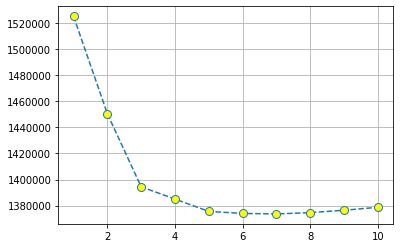


best model order p: 7

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


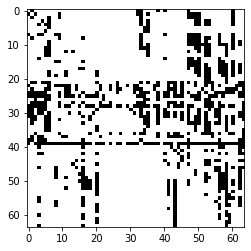

In [4]:
PDC_open = npm.Connectivity_Graph('PDC')
PDC_open.import_data(open_eyes)
PDC_open.connectivity(freq=freq_alpha,threshold=0.2,plot=True)
print(PDC_open.binary_adjacency_matrix)
plt.imshow(PDC_open.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

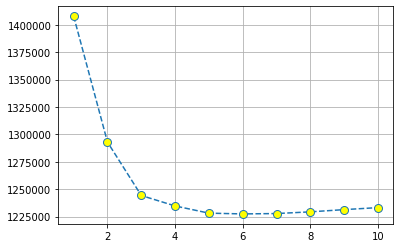


best model order p: 6

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


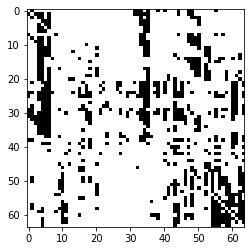

In [5]:
PDC_closed = npm.Connectivity_Graph('PDC')
PDC_closed.import_data(closed_eyes)
PDC_closed.connectivity(freq=freq_alpha,threshold=0.2,plot=True)
print(PDC_closed.binary_adjacency_matrix)
plt.imshow(PDC_closed.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

### 1.2. (class ‘A’) 
Perform task 1.1 using both estimators (PDC and DTF).

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

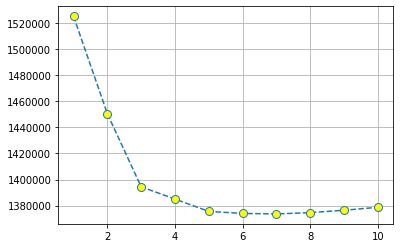


best model order p: 7

[[0. 1. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


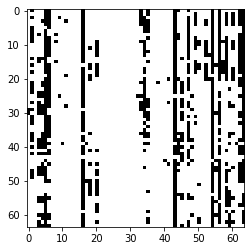

In [6]:
DTF_open = npm.Connectivity_Graph('DTF')
DTF_open.import_data(open_eyes)
DTF_open.connectivity(freq=freq_alpha,threshold=0.2,plot=True)
print(DTF_open.binary_adjacency_matrix)
plt.imshow(DTF_open.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

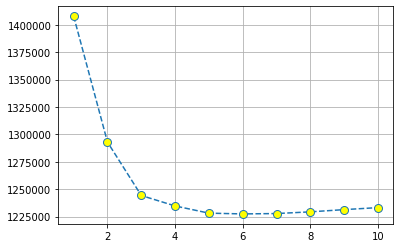


best model order p: 6

[[0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


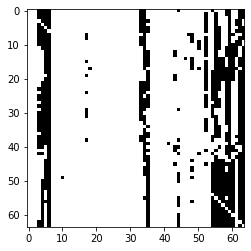

In [7]:
DTF_closed = npm.Connectivity_Graph('DTF')
DTF_closed.import_data(closed_eyes)
DTF_closed.connectivity(freq=freq_alpha,threshold=0.2,plot=True)
print(DTF_closed.binary_adjacency_matrix)
plt.imshow(DTF_closed.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

In [8]:
#Models Order computed from Akaike criterion

order_open = 7
order_closed = 6

### 1.3.(class ‘A’) 
Perform task 1.1 using thresholds yielding the following density values: 1%, 5%,
10%, 20%, 30%, 50%.

In [9]:
m_open = [] 
m_closed = []
densities = [0.01,0.05,0.1,0.2,0.3,0.5]
for d in tqdm_notebook(densities):
    PDC_open = npm.Connectivity_Graph('PDC')
    PDC_open.import_data(open_eyes)
    PDC_open.connectivity(freq=freq_alpha,threshold=d,order=order_open)
    m_open.append(PDC_open.binary_adjacency_matrix)
    PDC_closed = npm.Connectivity_Graph('PDC')
    PDC_closed.import_data(closed_eyes)
    PDC_closed.connectivity(freq=freq_alpha,threshold=d,order=order_closed)
    m_closed.append(PDC_closed.binary_adjacency_matrix)
    
m = [m_open,m_closed]

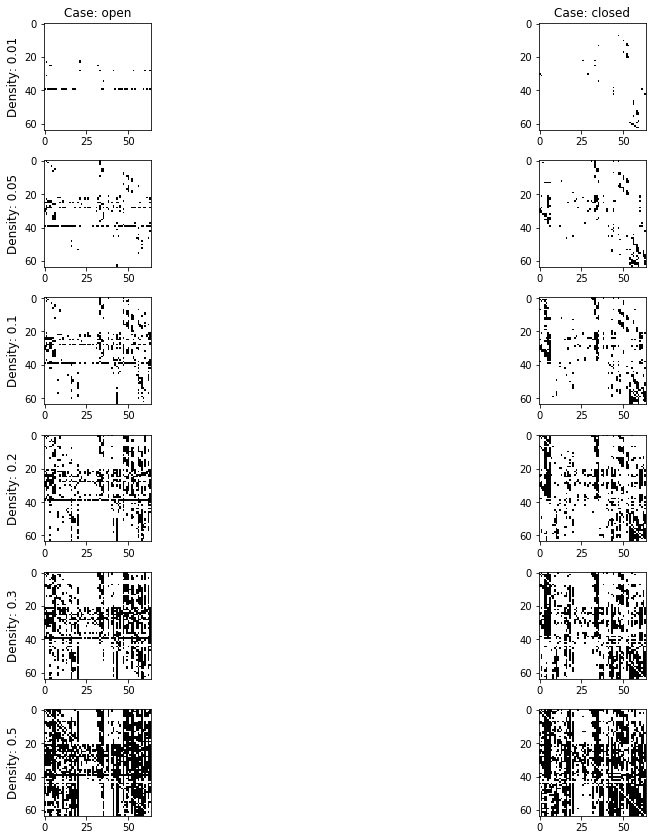

In [10]:
cols = ['Case: {}'.format(col) for col in ['open','closed']]
rows = ['Density: {}'.format(row) for row in densities]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,12))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')
    
r = 0
for row in axes:
    c = 0
    for col in row:
        col.imshow(m[c][r],cmap='Greys',interpolation='nearest')
        c += 1
    r += 1    

fig.tight_layout()
fig.subplots_adjust(left=0.05, top=0.95)
plt.show()

### 1.4.(class ‘D’) 
Considering the subset of 19 channels suggested in Figure 1 and Table 2, estimate
the connectivity using PDC or DTF and apply a statistical validation method (asymptotic
statistics 7 , resampling procedure 8 ,...) to filter out values that are not significantly different
from 0 (PDC(i, j) ≠ 0 with p < 5%).

In [11]:
channels = 'Fp1 Fp2 F7 F3 Fz F4 F8 T7 C3 Cz C4 T8 P7 P3 Pz P4 P8 O1 O2'.split(' ')

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [12]:
PDC_open = npm.Connectivity_Graph('PDC')
PDC_open.import_data(open_eyes,channels=channels)
PDC_open.connectivity(freq=freq_alpha,order=order_open)
PDC_open.significance(signf_threshold=0.05,channels=channels,visual=False,path=open_eyes,Nrep=1000)
#PDC_open.significance_matrix

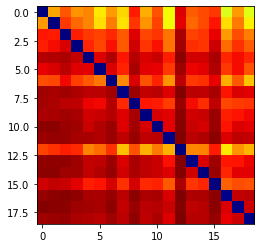

In [13]:
plt.imshow(PDC_open.significance_matrix,cmap='jet_r')

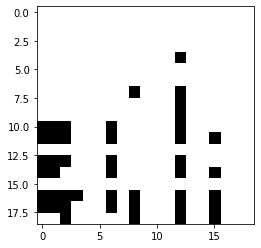

In [14]:
## associated binary adjacency matrix after insignificant connections removal

plt.imshow(PDC_open.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [15]:
PDC_closed = npm.Connectivity_Graph('PDC')
PDC_closed.import_data(closed_eyes,channels=channels)
PDC_closed.connectivity(freq=freq_alpha,order=order_closed)
PDC_closed.significance(signf_threshold=0.05,channels=channels,visual=False,path=open_eyes,Nrep=1000)
#PDC_closed.significance_matrix

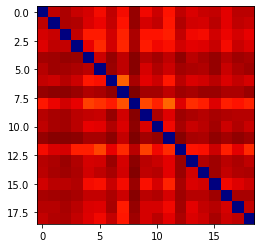

In [16]:
plt.imshow(PDC_closed.significance_matrix,cmap='jet_r')

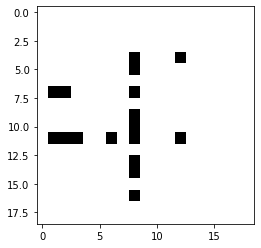

In [17]:
## associated binary adjacency matrix after insignificant connections removal

plt.imshow(PDC_closed.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

### 1.5.(class ‘C’) 
Make a topographical representation of the networks (see example in Figure 2).
Cartesian coordinates of planar representation of EEG channels are available in Table 3 (see also the file channel_locations.txt).

(the choice of this task is advised in the case of 19-channel networks and/or density ≤ 5%).

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

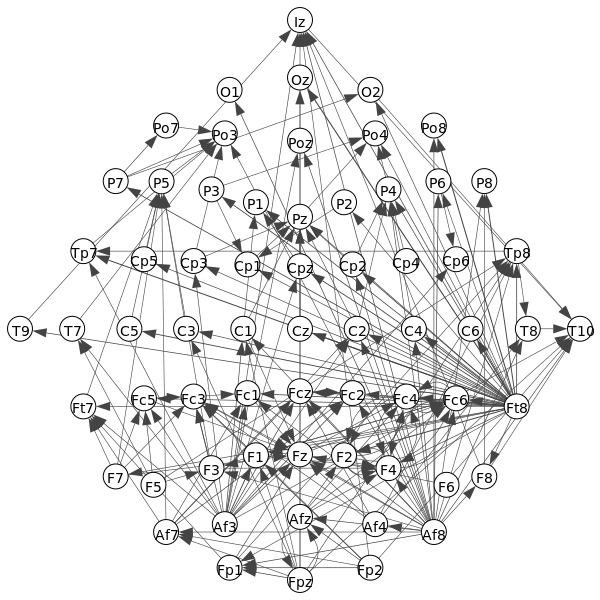

In [18]:
PDC_open = npm.Connectivity_Graph('PDC')
PDC_open.import_data(open_eyes)
PDC_open.connectivity(freq=freq_alpha,threshold=0.05,order=order_open)
PDC_open.show_graph('PDC_case_open')

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

/home/jason/anaconda3/lib/python3.7/site-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


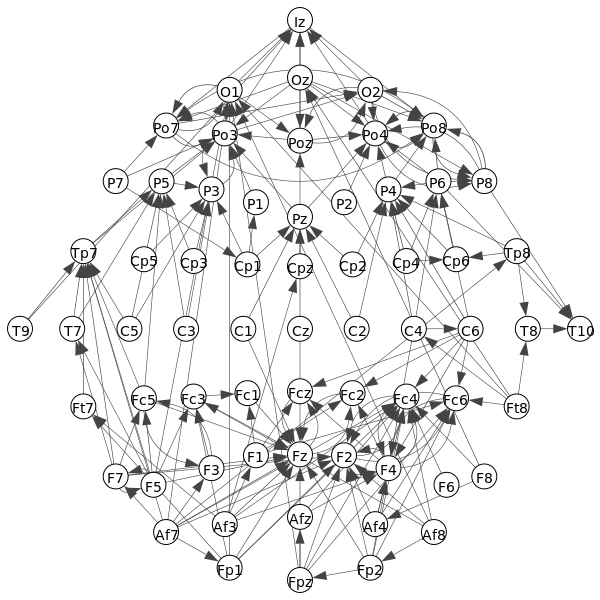

In [19]:
PDC_closed = npm.Connectivity_Graph('PDC')
PDC_closed.import_data(closed_eyes)
PDC_closed.connectivity(freq=freq_alpha,threshold=0.05,order=order_closed)
PDC_closed.show_graph('PDC_case_closed')

### 1.6. (class ‘B’) 
Perform task 1.1 considering a second frequency value belonging to a different EEG rhythm with respect to the first choice.

In [20]:
freq_beta = 20 ###20Hz Beta_Wave_Frequency

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


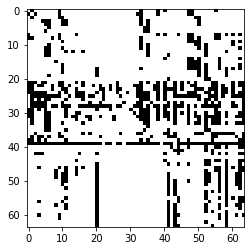

In [21]:
PDC_open = npm.Connectivity_Graph('PDC')
PDC_open.import_data(open_eyes)
PDC_open.connectivity(freq=freq_beta,threshold=0.2,order=order_open)
print(PDC_open.binary_adjacency_matrix)
plt.imshow(PDC_open.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


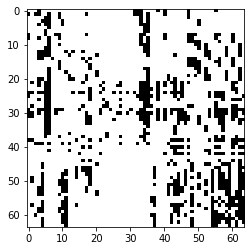

In [22]:
PDC_closed = npm.Connectivity_Graph('PDC')
PDC_closed.import_data(closed_eyes)
PDC_closed.connectivity(freq=freq_beta,threshold=0.2,order=order_closed)
print(PDC_closed.binary_adjacency_matrix)
plt.imshow(PDC_closed.binary_adjacency_matrix,cmap='Greys',interpolation='nearest')

## 2. Graph theory indices

### 2.1. (mandatory) 
Compute binary global (clustering coefficient, path length) and local (degree, in/out-degree) graph indices. List the highest 10 channels for local indices.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [23]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(open_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_open)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/o weights): "+'\x1b[0m', IDX.average_path_length(False))
print('\x1b[1;39m'+"GCC (w/o weights): "+'\x1b[0m', IDX.global_clustering_coefficient(False))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_outdegree())
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_degree())


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/o weights):  1.5830853174603174
GCC (w/o weights):  0.2703346932759426


Local indices 

Local indegree:  {'Fc5': 11, 'Fc3': 16, 'Fc1': 11, 'Fcz': 19, 'Fc2': 13, 'Fc4': 20, 'Fc6': 23, 'C5': 1, 'C3': 11, 'C1': 13, 'Cz': 3, 'C2': 12, 'C4': 7, 'C6': 5, 'Cp5': 5, 'Cp3': 7, 'Cp1': 25, 'Cpz': 7, 'Cp2': 9, 'Cp4': 3, 'Cp6': 23, 'Fp1': 6, 'Fpz': 4, 'Fp2': 1, 'Af7': 6, 'Af3': 0, 'Afz': 6, 'Af4': 4, 'Af8': 0, 'F7': 3, 'F5': 2, 'F3': 7, 'F1': 8, 'Fz': 21, 'F2': 14, 'F4': 19, 'F6': 1, 'F8': 4, 'Ft7': 15, 'Ft8': 0, 'T7': 11, 'T8': 19, 'T9': 6, 'T10': 26, 'Tp7': 9, 'Tp8': 15, 'P7': 1, 'P5': 29, 'P3': 13, 'P1': 25, 'Pz': 25, 'P2': 4, 'P4': 34, 'P6': 25, 'P8': 10, 'Po7': 11, 'Po3': 37, 'Poz': 16, 'Po4': 36, 'Po8': 11, 'O1': 28, 'Oz': 3, 'O2': 27, 'Iz': 20}
Local outdegree:  {'Fc5': 7, 'Fc3': 11, 'Fc1': 9, 'Fcz': 9, 'Fc2': 10, 'Fc4': 3, 'Fc6': 3, 'C5': 13, 'C3': 12, 'C1': 10, 'Cz': 15, 'C2': 11, 'C4': 10, 'C6': 6

In [24]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree()
local_outdegree_dict = IDX.local_outdegree()
local_degree_dict = IDX.local_degree()


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'Po3': 37, 'Po4': 36, 'P4': 34, 'P5': 29, 'O1': 28, 'O2': 27, 'T10': 26, 'Cp1': 25, 'P1': 25, 'Pz': 25}

Local outdegree: 

{'Ft8': 56, 'Af8': 41, 'Af3': 35, 'Af7': 32, 'Fpz': 26, 'Fp2': 25, 'F3': 25, 'F5': 23, 'Fp1': 22, 'Af4': 22}

Local degree: 

{'Ft8': 56, 'P4': 45, 'Po3': 44, 'Af8': 41, 'Po4': 40, 'Pz': 39, 'Af7': 38, 'Fz': 38, 'P5': 36, 'P1': 36}


<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [25]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(closed_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_closed)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/o weights): "+'\x1b[0m', IDX.average_path_length(False))
print('\x1b[1;39m'+"GCC (w/o weights): "+'\x1b[0m', IDX.global_clustering_coefficient(False))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_indegree())


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/o weights):  2.175843253968254
GCC (w/o weights):  0.2976075168226443


Local indices 

Local indegree:  {'Fc5': 8, 'Fc3': 15, 'Fc1': 5, 'Fcz': 29, 'Fc2': 39, 'Fc4': 24, 'Fc6': 34, 'C5': 2, 'C3': 3, 'C1': 9, 'Cz': 14, 'C2': 7, 'C4': 4, 'C6': 3, 'Cp5': 0, 'Cp3': 11, 'Cp1': 13, 'Cpz': 10, 'Cp2': 15, 'Cp4': 0, 'Cp6': 11, 'Fp1': 5, 'Fpz': 3, 'Fp2': 5, 'Af7': 1, 'Af3': 0, 'Afz': 3, 'Af4': 9, 'Af8': 1, 'F7': 5, 'F5': 2, 'F3': 4, 'F1': 5, 'Fz': 20, 'F2': 30, 'F4': 32, 'F6': 3, 'F8': 5, 'Ft7': 10, 'Ft8': 0, 'T7': 12, 'T8': 9, 'T9': 2, 'T10': 31, 'Tp7': 20, 'Tp8': 12, 'P7': 14, 'P5': 15, 'P3': 26, 'P1': 16, 'Pz': 21, 'P2': 0, 'P4': 19, 'P6': 15, 'P8': 16, 'Po7': 24, 'Po3': 21, 'Poz': 14, 'Po4': 19, 'Po8': 12, 'O1': 25, 'Oz': 20, 'O2': 19, 'Iz': 25}
Local outdegree:  {'Fc5': 8, 'Fc3': 15, 'Fc1': 5, 'Fcz': 29, 'Fc2': 39, 'Fc4': 24, 'Fc6': 34, 'C5': 2, 'C3': 3, 'C1': 9, 'Cz': 14, 'C2': 7, 'C4': 4, 'C6': 3, 

In [26]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree()
local_outdegree_dict = IDX.local_outdegree()
local_degree_dict = IDX.local_degree()


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'Fc2': 39, 'Fc6': 34, 'F4': 32, 'T10': 31, 'F2': 30, 'Fcz': 29, 'P3': 26, 'O1': 25, 'Iz': 25, 'Fc4': 24}

Local outdegree: 

{'Af7': 32, 'F7': 28, 'F5': 28, 'Af3': 24, 'F3': 22, 'Fp1': 21, 'F1': 19, 'O1': 18, 'Fpz': 17, 'Ft7': 17}

Local degree: 

{'Fc2': 46, 'O1': 43, 'F4': 42, 'Fc6': 39, 'F2': 38, 'Oz': 37, 'Fcz': 36, 'Pz': 36, 'Po4': 35, 'P3': 34}


### 2.2. (class ‘D’) 
Search in the literature a definition of small-worldness index (i.e. an index describing the small-world organization of a network) and compute it.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [27]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(open_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_open)

C = IDX.global_clustering_coefficient(False)
L = IDX.average_path_length(False)

print('\x1b[1;35m'+'\nAverage Path Length and Global Clustering Coefficient for\nGraph\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'L '+'\x1b[0m' + '= ' + str(L),'\x1b[1;39m'+ '    C '+'\x1b[0m' + '= ' + str(C) )


APL_rnd_list = []
GCC_rnd_list = []

for cnt in range(10):
    G_r_Adj = np.array([r for r in IDX.G.get_adjacency()])
    G_r_Adj = bct.randmio_dir(G_r_Adj, 10)[0]
    G_r_Adj = [list(r) for r in G_r_Adj]
    G_r_Adj = [[G_r_Adj[i][j].item() for j in range(len(G_r_Adj))] for i in range(len(G_r_Adj))]
    G_r = Graph.Adjacency(G_r_Adj)
    APL_rnd_list.append(npm.average_path_length(G_r, False))
    GCC_rnd_list.append(npm.global_clustering_coefficient(G_r, False))
    
    
L_r = np.mean(APL_rnd_list)
C_r = np.mean(GCC_rnd_list)

print('\x1b[1;35m'+'\nAverage Path Length and Global Clustering Coefficient for\nEquivalent Random Graph\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'L_r '+'\x1b[0m' + '= ' + str(L_r),'\x1b[1;39m'+ '    C_r '+'\x1b[0m' + '= ' + str(C_r) )

APL_ltc_list = []
GCC_ltc_list = []

for cnt in range(10):
    
    G_l_Adj = np.array([r for r in IDX.G.get_adjacency()])
    G_l_Adj = bct.latmio_dir(G_l_Adj, 10)[0]
    G_l_Adj = [list(r) for r in G_l_Adj]
    G_l_Adj = [[G_l_Adj[i][j].item() for j in range(len(G_r_Adj))] for i in range(len(G_r_Adj))]
    G_l = Graph.Adjacency(G_l_Adj)
    APL_ltc_list.append(npm.average_path_length(G_l, False))
    GCC_ltc_list.append(npm.global_clustering_coefficient(G_l, False))
    
L_l = np.mean(APL_ltc_list)
C_l = np.mean(GCC_ltc_list)

print('\x1b[1;35m'+'\nAverage Path Length and Global Clustering Coefficient for\nEquivalent Lattice Graph\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'L_l '+'\x1b[0m' + '= ' + str(L_l),'\x1b[1;39m'+ '    C_l '+'\x1b[0m' + '= ' + str(C_l) )

SWI = (L - L_l)/(L_r - L_l) * (C - C_r)/(C_l - C_r)

print('\x1b[1;35m'+'\nSmall World Index\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'SWI '+'\x1b[0m' + '=', SWI)


Average Path Length and Global Clustering Coefficient for
Graph

L = 1.5830853174603174     C = 0.2703346932759426

Average Path Length and Global Clustering Coefficient for
Equivalent Random Graph

L_r = 1.8119791666666665     C_r = 0.22370602057327957

Average Path Length and Global Clustering Coefficient for
Equivalent Lattice Graph

L_l = 2.313368055555556     C_l = 0.37592443571698564

Small World Index

SWI = 0.4461718715865767


<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [28]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(closed_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_closed)

C = IDX.global_clustering_coefficient(False)
L = IDX.average_path_length(False)

print('\x1b[1;35m'+'\nAverage Path Length and Global Clustering Coefficient for\nGraph\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'L '+'\x1b[0m' + '= ' + str(L),'\x1b[1;39m'+ '    C '+'\x1b[0m' + '= ' + str(C) )


APL_rnd_list = []
GCC_rnd_list = []

for cnt in range(10):
    G_r_Adj = np.array([r for r in IDX.G.get_adjacency()])
    G_r_Adj = bct.randmio_dir(G_r_Adj, 10)[0]
    G_r_Adj = [list(r) for r in G_r_Adj]
    G_r_Adj = [[G_r_Adj[i][j].item() for j in range(len(G_r_Adj))] for i in range(len(G_r_Adj))]
    G_r = Graph.Adjacency(G_r_Adj)
    APL_rnd_list.append(npm.average_path_length(G_r, False))
    GCC_rnd_list.append(npm.global_clustering_coefficient(G_r, False))
    
    
L_r = np.mean(APL_rnd_list)
C_r = np.mean(GCC_rnd_list)

print('\x1b[1;35m'+'\nAverage Path Length and Global Clustering Coefficient for\nEquivalent Random Graph\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'L_r '+'\x1b[0m' + '= ' + str(L_r),'\x1b[1;39m'+ '    C_r '+'\x1b[0m' + '= ' + str(C_r) )

APL_ltc_list = []
GCC_ltc_list = []

for cnt in range(10):
    
    G_l_Adj = np.array([r for r in IDX.G.get_adjacency()])
    G_l_Adj = bct.latmio_dir(G_l_Adj, 10)[0]
    G_l_Adj = [list(r) for r in G_l_Adj]
    G_l_Adj = [[G_l_Adj[i][j].item() for j in range(len(G_r_Adj))] for i in range(len(G_r_Adj))]
    G_l = Graph.Adjacency(G_l_Adj)
    APL_ltc_list.append(npm.average_path_length(G_l, False))
    GCC_ltc_list.append(npm.global_clustering_coefficient(G_l, False))
    
L_l = np.mean(APL_ltc_list)
C_l = np.mean(GCC_ltc_list)

print('\x1b[1;35m'+'\nAverage Path Length and Global Clustering Coefficient for\nEquivalent Lattice Graph\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'L_l '+'\x1b[0m' + '= ' + str(L_l),'\x1b[1;39m'+ '    C_l '+'\x1b[0m' + '= ' + str(C_l) )

SWI = (L - L_l)/(L_r - L_l) * (C - C_r)/(C_l - C_r)

print('\x1b[1;35m'+'\nSmall World Index\n' + '\x1b[0m')
print('\x1b[1;39m'+ 'SWI '+'\x1b[0m' + '=', SWI)


Average Path Length and Global Clustering Coefficient for
Graph

L = 2.175843253968254     C = 0.2976075168226443

Average Path Length and Global Clustering Coefficient for
Equivalent Random Graph

L_r = 1.7666666666666664     C_r = 0.21550418784685882

Average Path Length and Global Clustering Coefficient for
Equivalent Lattice Graph

L_l = 2.211359126984127     C_l = 0.42085410940325535

Small World Index

SWI = 0.03193220829855964


### 2.3. (class ‘B’) 
Compare the global indices extracted from PDC and DTF connectivity estimations.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [29]:
IDX = npm.Graph_Theory_Indices("DTF")
IDX.import_data(open_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_open)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/o weights): "+'\x1b[0m', IDX.average_path_length(False))
print('\x1b[1;39m'+"GCC (w/o weights): "+'\x1b[0m', IDX.global_clustering_coefficient(False))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_outdegree())
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_degree())


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/o weights):  0.9064980158730158
GCC (w/o weights):  0.4616604825678823


Local indices 

Local indegree:  {'Fc5': 2, 'Fc3': 27, 'Fc1': 0, 'Fcz': 21, 'Fc2': 24, 'Fc4': 56, 'Fc6': 41, 'C5': 0, 'C3': 3, 'C1': 2, 'Cz': 1, 'C2': 3, 'C4': 0, 'C6': 0, 'Cp5': 0, 'Cp3': 0, 'Cp1': 58, 'Cpz': 2, 'Cp2': 13, 'Cp4': 0, 'Cp6': 22, 'Fp1': 0, 'Fpz': 0, 'Fp2': 0, 'Af7': 0, 'Af3': 0, 'Afz': 0, 'Af4': 0, 'Af8': 0, 'F7': 0, 'F5': 0, 'F3': 0, 'F1': 1, 'Fz': 12, 'F2': 31, 'F4': 23, 'F6': 0, 'F8': 0, 'Ft7': 1, 'Ft8': 0, 'T7': 1, 'T8': 3, 'T9': 0, 'T10': 61, 'Tp7': 13, 'Tp8': 21, 'P7': 0, 'P5': 38, 'P3': 7, 'P1': 14, 'Pz': 7, 'P2': 0, 'P4': 12, 'P6': 2, 'P8': 61, 'Po7': 7, 'Po3': 54, 'Poz': 5, 'Po4': 31, 'Po8': 16, 'O1': 17, 'Oz': 1, 'O2': 35, 'Iz': 57}
Local outdegree:  {'Fc5': 13, 'Fc3': 13, 'Fc1': 16, 'Fcz': 18, 'Fc2': 16, 'Fc4': 10, 'Fc6': 10, 'C5': 12, 'C3': 14, 'C1': 20, 'Cz': 16, 'C2': 16, 'C4': 14, 'C6': 14, 'Cp

In [30]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree()
local_outdegree_dict = IDX.local_outdegree()
local_degree_dict = IDX.local_degree()


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'T10': 61, 'P8': 61, 'Cp1': 58, 'Iz': 57, 'Fc4': 56, 'Po3': 54, 'Fc6': 41, 'P5': 38, 'O2': 35, 'F2': 31}

Local outdegree: 

{'C1': 20, 'Fcz': 18, 'Cpz': 18, 'Cp1': 17, 'Cp2': 17, 'Cp6': 17, 'Af8': 17, 'F6': 17, 'Fc1': 16, 'Fc2': 16}

Local degree: 

{'Cp1': 75, 'P8': 73, 'Iz': 67, 'Fc4': 66, 'T10': 64, 'Po3': 64, 'P5': 53, 'Fc6': 51, 'O2': 49, 'Fc3': 40}


<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [31]:
IDX = npm.Graph_Theory_Indices("DTF")
IDX.import_data(closed_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_closed)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/o weights): "+'\x1b[0m', IDX.average_path_length(False))
print('\x1b[1;39m'+"GCC (w/o weights): "+'\x1b[0m', IDX.global_clustering_coefficient(False))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_outdegree())
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_degree())


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/o weights):  0.4508928571428571
GCC (w/o weights):  0.5492694923305701


Local indices 

Local indegree:  {'Fc5': 0, 'Fc3': 0, 'Fc1': 0, 'Fcz': 27, 'Fc2': 46, 'Fc4': 48, 'Fc6': 63, 'C5': 0, 'C3': 0, 'C1': 0, 'Cz': 1, 'C2': 0, 'C4': 0, 'C6': 0, 'Cp5': 0, 'Cp3': 0, 'Cp1': 0, 'Cpz': 9, 'Cp2': 1, 'Cp4': 0, 'Cp6': 0, 'Fp1': 0, 'Fpz': 0, 'Fp2': 0, 'Af7': 0, 'Af3': 0, 'Afz': 0, 'Af4': 0, 'Af8': 0, 'F7': 0, 'F5': 0, 'F3': 0, 'F1': 0, 'Fz': 24, 'F2': 43, 'F4': 44, 'F6': 0, 'F8': 0, 'Ft7': 0, 'Ft8': 0, 'T7': 0, 'T8': 1, 'T9': 0, 'T10': 7, 'Tp7': 15, 'Tp8': 0, 'P7': 1, 'P5': 1, 'P3': 12, 'P1': 0, 'Pz': 5, 'P2': 0, 'P4': 31, 'P6': 0, 'P8': 35, 'Po7': 56, 'Po3': 44, 'Poz': 26, 'Po4': 43, 'Po8': 62, 'O1': 33, 'Oz': 13, 'O2': 56, 'Iz': 59}
Local outdegree:  {'Fc5': 12, 'Fc3': 12, 'Fc1': 11, 'Fcz': 11, 'Fc2': 10, 'Fc4': 12, 'Fc6': 13, 'C5': 13, 'C3': 14, 'C1': 14, 'Cz': 14, 'C2': 13, 'C4': 12, 'C6': 12, 'Cp5': 

In [32]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree()
local_outdegree_dict = IDX.local_outdegree()
local_degree_dict = IDX.local_degree()


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'Fc6': 63, 'Po8': 62, 'Iz': 59, 'Po7': 56, 'O2': 56, 'Fc4': 48, 'Fc2': 46, 'F4': 44, 'Po3': 44, 'F2': 43}

Local outdegree: 

{'Cpz': 15, 'Fp2': 15, 'Afz': 15, 'Af8': 15, 'F8': 15, 'P1': 15, 'C3': 14, 'C1': 14, 'Cz': 14, 'Cp3': 14}

Local degree: 

{'Fc6': 76, 'Po8': 73, 'Iz': 72, 'O2': 69, 'Po7': 68, 'Fc4': 60, 'Po3': 58, 'Fc2': 56, 'F4': 55, 'F2': 54}


### 2.4.(class ‘C’)
Study the behaviour of global graph indices in function of network density (see point 2.3 for density values).

(the choice of this task is advised in the case of selection of task 1.3).

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [33]:
random.seed (7890)
APL_list = []
GCC_list = []

densities = [0.01,0.05,0.1,0.2,0.3,0.5]

for d in tqdm_notebook(densities):
    
    IDX = npm.Graph_Theory_Indices("PDC")
    IDX.import_data(open_eyes)
    IDX.connectivity(freq=freq_alpha, threshold=d, plot=False,order=order_open)
    
    APL_list.append(IDX.average_path_length(False))
    GCC_list.append(IDX.global_clustering_coefficient(False))

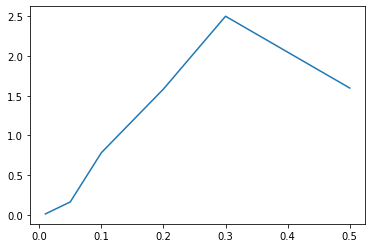

In [34]:
plt.plot(densities, APL_list)

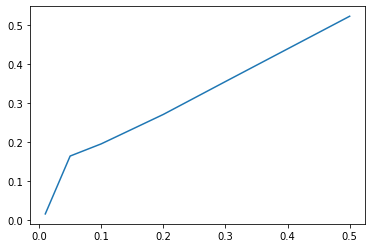

In [35]:
plt.plot(densities, GCC_list)

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [36]:
APL_list = []
GCC_list = []

densities = [0.01,0.05,0.1,0.2,0.3,0.5]

for d in tqdm_notebook(densities):
    
    IDX = npm.Graph_Theory_Indices("PDC")
    IDX.import_data(closed_eyes)
    IDX.connectivity(freq=freq_alpha, threshold=d, plot=False,order=order_closed)
    
    APL_list.append(IDX.average_path_length(False))
    GCC_list.append(IDX.global_clustering_coefficient(False))

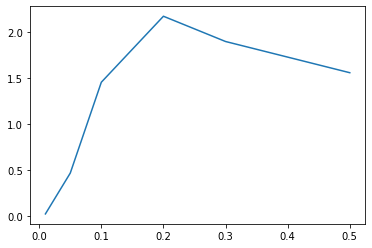

In [37]:
plt.plot(densities, APL_list)

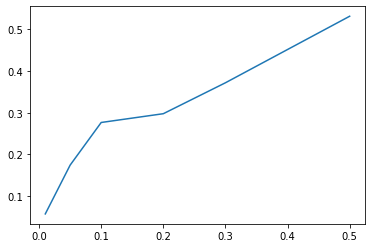

In [38]:
plt.plot(densities, GCC_list)

### 2.5.(class ‘B’) 
Make a topographical representation of local indices.

In [39]:
def plot_graph(G, name, degree_list):
        
        G.es['arrow_size'] = [0.1 for edge in G.es]
        visual_style = {}
        visual_style["vertex_size"] = degree_list*10
        visual_style["vertex_color"] = "red"
        visual_style["vertex_label"] = G.vs["label"]
        visual_style["edge_width"] = 0.2
        visual_style["layout"] = G.vs["coords"]
        
        graph = igraph.plot(G, bbox=(0, 0, 600, 600), **visual_style)
        graph.save(name + '.png')
        
        return(graph)

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [40]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(open_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_open)

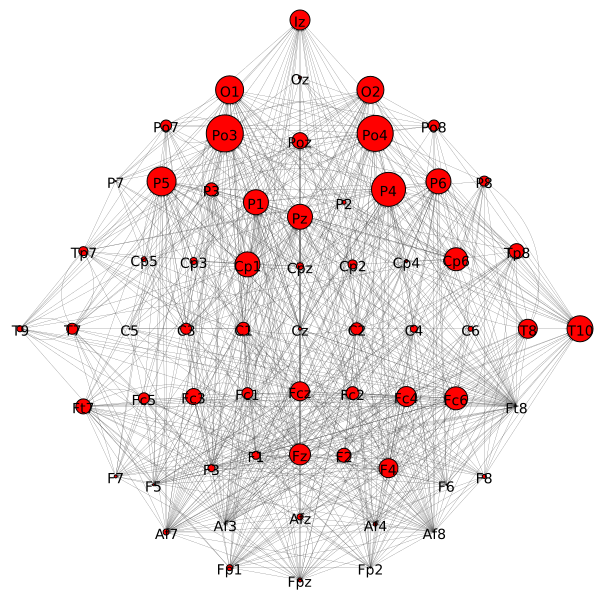

In [41]:
degree_list = list(IDX.local_indegree().values())
plot_graph(IDX.G, "EO_indegree_graph", degree_list)

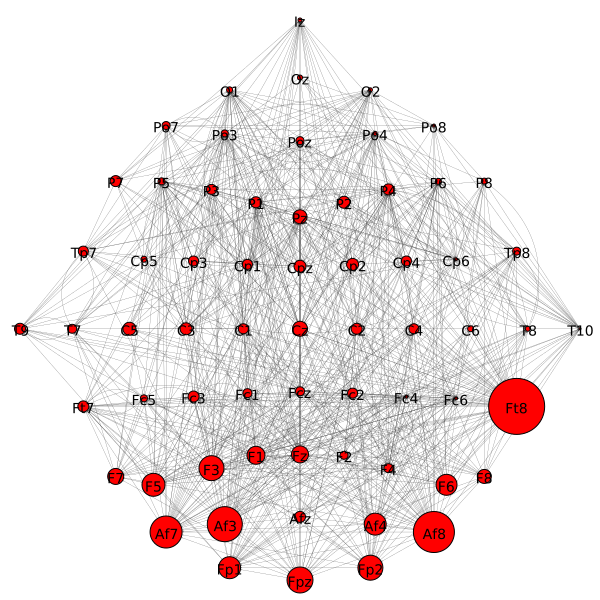

In [42]:
degree_list = list(IDX.local_outdegree().values())
plot_graph(IDX.G, "EO_outdegree_graph", degree_list)

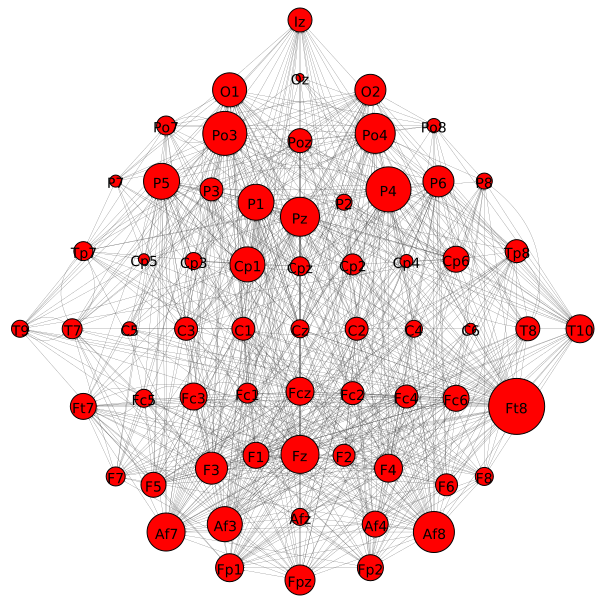

In [43]:
degree_list = list(IDX.local_degree().values())
plot_graph(IDX.G, "EO_degree_graph", degree_list)

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [44]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(closed_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_closed)

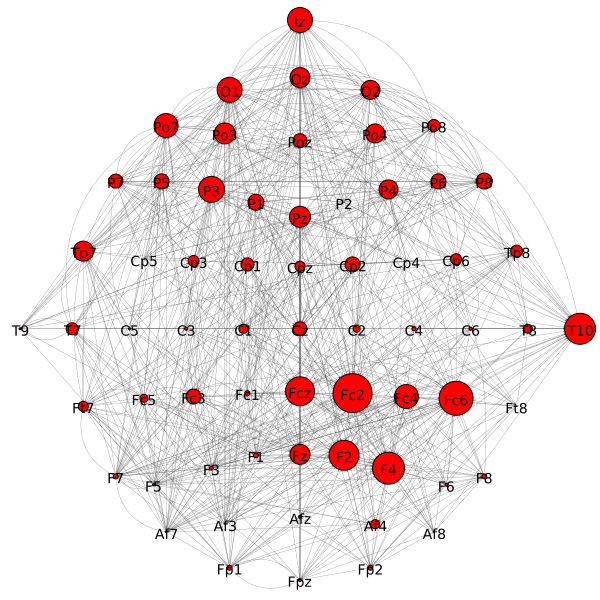

In [45]:
degree_list = list(IDX.local_indegree().values())
plot_graph(IDX.G, "EC_indegree_graph", degree_list)

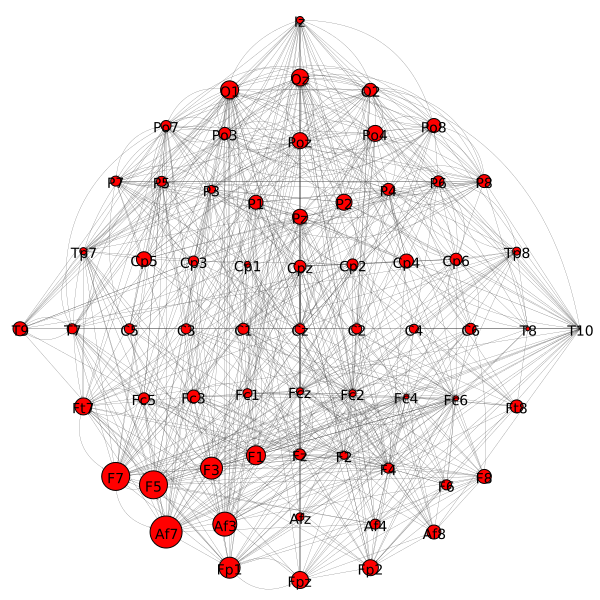

In [46]:
degree_list = list(IDX.local_outdegree().values())
plot_graph(IDX.G, "EC_outdegree_graph", degree_list)

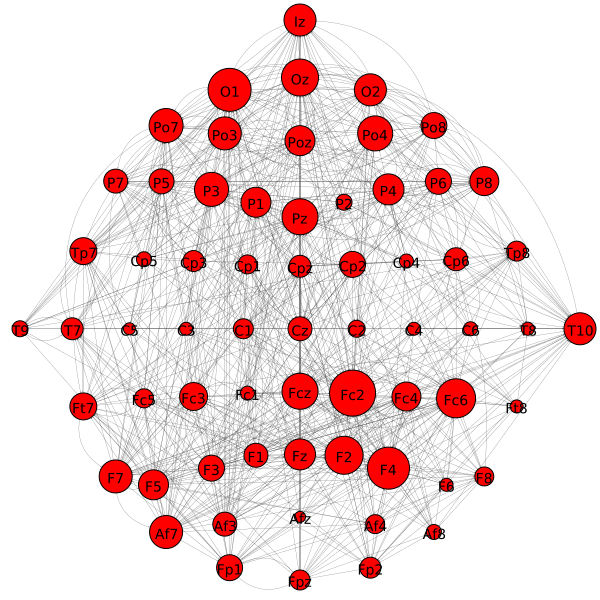

In [47]:
degree_list = list(IDX.local_degree().values())
plot_graph(IDX.G, "EC_degree_graph", degree_list)

### 2.6. (class ‘B’) 
Compare the networks obtained with the analysis 1.6 in terms of graph indices.

(the choice of this task is advised only in the case of selection of task 1.6)

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [48]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(open_eyes)
IDX.connectivity(freq=freq_beta, threshold=0.2, plot=False,order=order_open)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/o weights): "+'\x1b[0m', IDX.average_path_length(False))
print('\x1b[1;39m'+"GCC (w/o weights): "+'\x1b[0m', IDX.global_clustering_coefficient(False))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_outdegree())
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_degree())


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/o weights):  3.313988095238095
GCC (w/o weights):  0.286981038201807


Local indices 

Local indegree:  {'Fc5': 12, 'Fc3': 19, 'Fc1': 9, 'Fcz': 14, 'Fc2': 10, 'Fc4': 21, 'Fc6': 18, 'C5': 6, 'C3': 8, 'C1': 15, 'Cz': 21, 'C2': 22, 'C4': 4, 'C6': 3, 'Cp5': 13, 'Cp3': 6, 'Cp1': 11, 'Cpz': 3, 'Cp2': 7, 'Cp4': 4, 'Cp6': 27, 'Fp1': 7, 'Fpz': 5, 'Fp2': 2, 'Af7': 5, 'Af3': 2, 'Afz': 6, 'Af4': 5, 'Af8': 1, 'F7': 2, 'F5': 2, 'F3': 4, 'F1': 10, 'Fz': 25, 'F2': 12, 'F4': 21, 'F6': 3, 'F8': 4, 'Ft7': 15, 'Ft8': 0, 'T7': 17, 'T8': 28, 'T9': 4, 'T10': 27, 'Tp7': 13, 'Tp8': 9, 'P7': 2, 'P5': 23, 'P3': 13, 'P1': 17, 'Pz': 21, 'P2': 4, 'P4': 36, 'P6': 15, 'P8': 18, 'Po7': 22, 'Po3': 30, 'Poz': 6, 'Po4': 33, 'Po8': 2, 'O1': 15, 'Oz': 12, 'O2': 30, 'Iz': 25}
Local outdegree:  {'Fc5': 8, 'Fc3': 8, 'Fc1': 6, 'Fcz': 8, 'Fc2': 7, 'Fc4': 3, 'Fc6': 3, 'C5': 13, 'C3': 10, 'C1': 8, 'Cz': 7, 'C2': 8, 'C4': 8, 'C6': 5, 'Cp5':

In [49]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree()
local_outdegree_dict = IDX.local_outdegree()
local_degree_dict = IDX.local_degree()


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'P4': 36, 'Po4': 33, 'Po3': 30, 'O2': 30, 'T8': 28, 'Cp6': 27, 'T10': 27, 'Fz': 25, 'Iz': 25, 'P5': 23}

Local outdegree: 

{'Ft8': 59, 'Af8': 44, 'Af3': 39, 'Af7': 33, 'F3': 31, 'Fp2': 30, 'Fpz': 29, 'F5': 24, 'Fp1': 23, 'F6': 21}

Local degree: 

{'Ft8': 59, 'Af8': 45, 'Fz': 44, 'P4': 43, 'Af3': 41, 'Po4': 40, 'Po3': 39, 'Af7': 38, 'F3': 35, 'O2': 35}


<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [50]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(closed_eyes)
IDX.connectivity(freq=freq_beta, threshold=0.2, plot=False,order=order_closed)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/o weights): "+'\x1b[0m', IDX.average_path_length(False))
print('\x1b[1;39m'+"GCC (w/o weights): "+'\x1b[0m', IDX.global_clustering_coefficient(False))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree())
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_outdegree())
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_degree())


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/o weights):  1.940972222222222
GCC (w/o weights):  0.2795460431477949


Local indices 

Local indegree:  {'Fc5': 9, 'Fc3': 9, 'Fc1': 3, 'Fcz': 20, 'Fc2': 24, 'Fc4': 25, 'Fc6': 33, 'C5': 1, 'C3': 3, 'C1': 15, 'Cz': 16, 'C2': 17, 'C4': 6, 'C6': 3, 'Cp5': 6, 'Cp3': 3, 'Cp1': 10, 'Cpz': 14, 'Cp2': 19, 'Cp4': 0, 'Cp6': 6, 'Fp1': 6, 'Fpz': 4, 'Fp2': 4, 'Af7': 1, 'Af3': 2, 'Afz': 2, 'Af4': 8, 'Af8': 0, 'F7': 2, 'F5': 1, 'F3': 3, 'F1': 5, 'Fz': 20, 'F2': 25, 'F4': 31, 'F6': 7, 'F8': 12, 'Ft7': 11, 'Ft8': 0, 'T7': 12, 'T8': 8, 'T9': 13, 'T10': 24, 'Tp7': 22, 'Tp8': 15, 'P7': 11, 'P5': 18, 'P3': 20, 'P1': 8, 'Pz': 17, 'P2': 0, 'P4': 17, 'P6': 14, 'P8': 16, 'Po7': 22, 'Po3': 28, 'Poz': 22, 'Po4': 18, 'Po8': 18, 'O1': 24, 'Oz': 19, 'O2': 33, 'Iz': 21}
Local outdegree:  {'Fc5': 8, 'Fc3': 12, 'Fc1': 6, 'Fcz': 7, 'Fc2': 8, 'Fc4': 3, 'Fc6': 3, 'C5': 14, 'C3': 11, 'C1': 9, 'Cz': 9, 'C2': 8, 'C4': 13, 'C6': 12, '

In [51]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree()
local_outdegree_dict = IDX.local_outdegree()
local_degree_dict = IDX.local_degree()


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'Fc6': 33, 'O2': 33, 'F4': 31, 'Po3': 28, 'Fc4': 25, 'F2': 25, 'Fc2': 24, 'T10': 24, 'O1': 24, 'Tp7': 22}

Local outdegree: 

{'F5': 30, 'Af7': 29, 'F7': 29, 'F3': 22, 'F1': 20, 'P2': 20, 'Poz': 20, 'Ft7': 19, 'Fp1': 18, 'P4': 18}

Local degree: 

{'O2': 47, 'Po3': 42, 'Poz': 42, 'O1': 40, 'F4': 37, 'Fc6': 36, 'P3': 36, 'P4': 35, 'Pz': 34, 'Oz': 34}


### 2.7. (class ‘C’)
Perform point 2.1 considering the weighted version of the graph indices definitions.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [52]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(open_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_open)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/ weights): "+'\x1b[0m', IDX.average_path_length(True))
print('\x1b[1;39m'+"GCC (w/ weights): "+'\x1b[0m', IDX.global_clustering_coefficient(True))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree(True))
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_indegree(True))
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_indegree(True))


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/ weights):  0.20588908815171106
GCC (w/ weights):  0.04364233218120603


Local indices 

Local indegree:  {'Fc5': 1.957, 'Fc3': 3.096, 'Fc1': 2.14, 'Fcz': 3.296, 'Fc2': 2.797, 'Fc4': 3.369, 'Fc6': 3.709, 'C5': 0.591, 'C3': 1.579, 'C1': 2.004, 'Cz': 1.043, 'C2': 1.879, 'C4': 1.416, 'C6': 0.87, 'Cp5': 0.85, 'Cp3': 1.059, 'Cp1': 3.476, 'Cpz': 1.394, 'Cp2': 1.478, 'Cp4': 0.35, 'Cp6': 3.074, 'Fp1': 1.501, 'Fpz': 0.588, 'Fp2': 0.14, 'Af7': 0.966, 'Af3': 0.0, 'Afz': 1.191, 'Af4': 0.573, 'Af8': 0.0, 'F7': 0.528, 'F5': 0.265, 'F3': 1.144, 'F1': 1.744, 'Fz': 3.875, 'F2': 2.634, 'F4': 3.483, 'F6': 0.164, 'F8': 0.686, 'Ft7': 2.311, 'Ft8': 0.0, 'T7': 1.533, 'T8': 2.598, 'T9': 0.995, 'T10': 3.947, 'Tp7': 1.866, 'Tp8': 2.619, 'P7': 0.481, 'P5': 4.365, 'P3': 1.965, 'P1': 3.743, 'Pz': 4.001, 'P2': 0.587, 'P4': 4.905, 'P6': 3.471, 'P8': 2.064, 'Po7': 1.471, 'Po3': 5.323, 'Poz': 2.254, 'Po4': 4.887, 'Po8': 2.158, 

In [53]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree(True)
local_outdegree_dict = IDX.local_outdegree(True)
local_degree_dict = IDX.local_degree(True)


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'Po3': 5.323, 'P4': 4.905, 'Po4': 4.887, 'P5': 4.365, 'Pz': 4.001, 'T10': 3.947, 'Fz': 3.875, 'O2': 3.786, 'O1': 3.779, 'P1': 3.743}

Local outdegree: 

{'Ft8': 18.339, 'Af8': 8.971, 'Af3': 6.946, 'Af7': 4.817, 'Fpz': 4.191, 'Fp2': 4.185, 'F3': 3.616, 'F5': 3.432, 'Af4': 3.261, 'Fp1': 3.057}

Local degree: 

{'Ft8': 18.339, 'Af8': 8.971, 'Af3': 6.946, 'P4': 6.304, 'Fz': 6.245, 'Po3': 6.151, 'Pz': 5.807, 'Af7': 5.784, 'Po4': 5.401, 'P5': 5.366}


<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [54]:
IDX = npm.Graph_Theory_Indices("PDC")
IDX.import_data(closed_eyes)
IDX.connectivity(freq=freq_alpha, threshold=0.2, plot=False,order=order_open)

print('\x1b[1;35m'+'\nGlobal indices'+'\x1b[0m \n')
print("APL (Average Path Length) and GCC (Global Clustering Coefficient)\n")
print('\x1b[1;39m'+"APL (w/ weights): "+'\x1b[0m', IDX.average_path_length(True))
print('\x1b[1;39m'+"GCC (w/ weights): "+'\x1b[0m', IDX.global_clustering_coefficient(True))
print("\n")
print('\x1b[1;35m'+'Local indices'+'\x1b[0m \n')
print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m', IDX.local_indegree(True))
print('\x1b[1;39m'+"Local outdegree: "+'\x1b[0m', IDX.local_indegree(True))
print('\x1b[1;39m'+"Local degree: "+'\x1b[0m', IDX.local_indegree(True))


Global indices 

APL (Average Path Length) and GCC (Global Clustering Coefficient)

APL (w/ weights):  0.3107543480489508
GCC (w/ weights):  0.049220312561394024


Local indices 

Local indegree:  {'Fc5': 1.461, 'Fc3': 2.07, 'Fc1': 1.014, 'Fcz': 5.036, 'Fc2': 5.072, 'Fc4': 4.133, 'Fc6': 5.154, 'C5': 0.256, 'C3': 1.15, 'C1': 0.634, 'Cz': 2.431, 'C2': 1.105, 'C4': 0.762, 'C6': 0.445, 'Cp5': 0.0, 'Cp3': 0.939, 'Cp1': 1.809, 'Cpz': 2.165, 'Cp2': 2.404, 'Cp4': 0.0, 'Cp6': 1.315, 'Fp1': 0.763, 'Fpz': 0.523, 'Fp2': 0.751, 'Af7': 0.169, 'Af3': 0.116, 'Afz': 0.577, 'Af4': 1.51, 'Af8': 0.121, 'F7': 0.85, 'F5': 0.368, 'F3': 0.718, 'F1': 0.686, 'Fz': 3.471, 'F2': 4.593, 'F4': 4.821, 'F6': 0.472, 'F8': 1.123, 'Ft7': 1.503, 'Ft8': 0.0, 'T7': 1.702, 'T8': 0.895, 'T9': 0.279, 'T10': 4.22, 'Tp7': 3.969, 'Tp8': 2.735, 'P7': 1.37, 'P5': 2.504, 'P3': 3.925, 'P1': 2.031, 'Pz': 3.767, 'P2': 0.231, 'P4': 3.575, 'P6': 1.963, 'P8': 2.699, 'Po7': 3.391, 'Po3': 3.863, 'Poz': 2.032, 'Po4': 3.586, 'Po8': 2.826, '

In [55]:
print('\x1b[1;35m'+'Top 10'+'\x1b[0m \n')
local_indegree_dict = IDX.local_indegree(True)
local_outdegree_dict = IDX.local_outdegree(True)
local_degree_dict = IDX.local_degree(True)


print('\x1b[1;39m'+"Local indegree: "+'\x1b[0m\n')
print(npm.top10(local_indegree_dict))
print('\n\x1b[1;39m'+"Local outdegree: "+'\x1b[0m\n')
print(npm.top10(local_outdegree_dict))
print('\n\x1b[1;39m'+"Local degree: "+'\x1b[0m\n')
print(npm.top10(local_degree_dict))

Top 10 

Local indegree: 

{'Fc6': 5.154, 'Fc2': 5.072, 'Fcz': 5.036, 'F4': 4.821, 'F2': 4.593, 'T10': 4.22, 'Fc4': 4.133, 'Tp7': 3.969, 'P3': 3.925, 'Po3': 3.863}

Local outdegree: 

{'Af7': 4.653, 'F7': 4.605, 'F5': 4.518, 'Af3': 4.37, 'Fp1': 3.359, 'Fpz': 3.268, 'F3': 3.148, 'Oz': 2.829, 'Poz': 2.811, 'P8': 2.755}

Local degree: 

{'Po3': 6.369, 'O1': 6.197, 'F4': 6.178, 'Fc2': 6.132, 'Pz': 6.084, 'F2': 6.027, 'Fc6': 6.018, 'Fcz': 6.01, 'Po7': 5.868, 'Oz': 5.69}


## 3. Motif analysis

### 3.1 (mandatory) 

Perform motifs analysis to investigate the presence of 3-node configurations in the networks: determine their frequency and statistical significance (motifs, anti-motifs).

In [56]:
## alpha waves
## threshold: 0.05
## method: PDC
## method for p: AIC

freq=10
threshold=0.05
method = 'PDC'

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

loaded EO resting state data


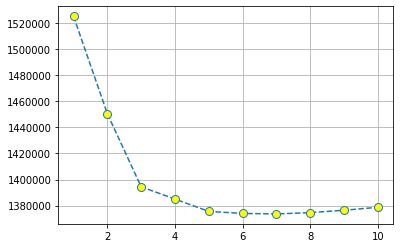


best model order p: 7

created text file into 'data/EO_10Hz_0.05dt_Motifs.txt'


In [57]:
# Create EO connectivity graph for 10Hz frequence
# then save the edges in txt file for mfinder app

EO = npm.Graph_for_motifs(method, 'EO', density_threshold=threshold, freq=freq, folder='data/')
EO.connectivity(freq=freq,threshold=threshold,plot=True)
EO.preprocess_for_mfinder()

In [58]:
# performing motifs analysis with mfinder:

# mfinder ../data/EO_10Hz_0.05dt_Motifs.txt -s 3 -r 2000 -nu
# mfinder ../data/EC_10Hz_0.05dt_Motifs.txt -s 3 -r 2000 -nu

In [59]:
with open('data/EO_10Hz_0.05dt_Motifs_OUT.txt', 'r') as f:
    print (f.read())


   Summary motif results
mfinder Version 1.20

MOTIF FINDER RESULTS:

	Network name: ../data/EO_10Hz_0.05dt_Motifs.txt
	Network type: Directed
	Num of Nodes: 63 Num of Edges: 201
	Num of Nodes with edges: 63
	Maximal out degree (out-hub) : 41
	Maximal in degree (in-hub) : 10
	Roots num: 7 Leaves num: 12
	Single Edges num: 181 Mutual Edges num: 7

	Motif size searched  3
	Total number of 3-node subgraphs : 1935
	Number of random networks generated : 2000
	Random networks generation method: Switches
	Num of Switches range: 100.0-200.0, Success switches Ratio:0.372+-0.01

The following motifs were found:

Criteria taken : Pval < 0.010
                 Mfactor > 1.10
                 Uniquness ignored

MOTIF	NREAL	NRAND		NREAL	NREAL	UNIQ	CREAL
ID		STATS		ZSCORE	PVAL	VAL	[MILI]	
108	17	7.5+-2.5	3.84	0.000	0	8.79

0 0 1 
1 0 1 
1 0 0 




Full list of subgraphs size 3 ids:

	( Total num of different subgraphs size 3 is : 13 )

MOTIF	NREAL	NRAND		NREAL	NREAL	CREAL	UNIQ
ID		STATS		ZSCORE	PVAL

<h3><font color="darkorange">Summary for EO:</font></h3>

===============

2 motifs detected:

| ID       | 6, 108 |

<img src="EO_motifs.png" width="50%" height="50%">

===============

1 anti-motifs detected:

| ID | x |

<img src="EO_antimotifs.png" width="20%" height="20%">




-----------

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

loaded EC resting state data


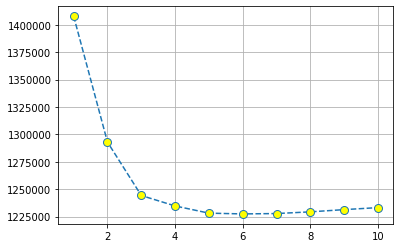


best model order p: 6

created text file into 'data/EC_10Hz_0.05dt_Motifs.txt'


In [60]:
# Create EC connectivity graph for 10Hz frequence
# then save the edges in txt file for mfinder app

EC = npm.Graph_for_motifs(method, 'EC', density_threshold=threshold, freq=freq_alpha, folder='data/')
EC.connectivity(freq=freq,threshold=threshold,plot=True)
EC.preprocess_for_mfinder()

In [61]:
with open('data/EC_10Hz_0.05dt_Motifs_OUT.txt', 'r') as f:
    print (f.read())


   Summary motif results
mfinder Version 1.20

MOTIF FINDER RESULTS:

	Network name: ../data/EC_10Hz_0.05dt_Motifs.txt
	Network type: Directed
	Num of Nodes: 63 Num of Edges: 201
	Num of Nodes with edges: 63
	Maximal out degree (out-hub) : 9
	Maximal in degree (in-hub) : 14
	Roots num: 18 Leaves num: 1
	Single Edges num: 160 Mutual Edges num: 17

	Motif size searched  3
	Total number of 3-node subgraphs : 959
	Number of random networks generated : 2000
	Random networks generation method: Switches
	Num of Switches range: 100.0-200.0, Success switches Ratio:0.688+-0.01

The following motifs were found:

Criteria taken : Pval < 0.010
                 Mfactor > 1.10
                 Uniquness ignored

MOTIF	NREAL	NRAND		NREAL	NREAL	UNIQ	CREAL
ID		STATS		ZSCORE	PVAL	VAL	[MILI]	
38	59	25.9+-4.5	7.34	0.000	0	61.46

0 1 1 
0 0 1 
0 0 0 

46	7	0.8+-0.9	7.18	0.000	0	7.29

0 1 1 
1 0 1 
0 0 0 

108	32	9.8+-2.8	8.01	0.000	0	33.33

0 0 1 
1 0 1 
1 0 0 

238	3	0.4+-0.6	4.62	0.002	0	3.12

0 1 1 
1 0

<h3><font color="darkorange">Summary for EC:</font></h3>

===============

4 motifs detected:

| ID       | 38,  46, 108, 238|

<img src="EC_motifs.png" width="50%" height="50%">


===============

x anti-motifs detected

<img src="EC_antimotifs.png" width="40%" height="40%">



| ID | x |

-----------

### 3.2. (class ‘C’)
For the motif with pattern A → B ← C, create a topographical representation of the networks considering only the connections involved in this configuration.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [62]:
# Motif file structure: EO
with open('data/EO_10Hz_0.05dt_Motifs_MEMBERS.txt', 'r') as f:
    for _ in range(9):
        print(f.readline())
    
    print('\t...')

subgraph id = 36

Nreal : 265


Full list of 265 members:



1	24	2	

1	39	2	

1	36	33	

2	36	33	

	...


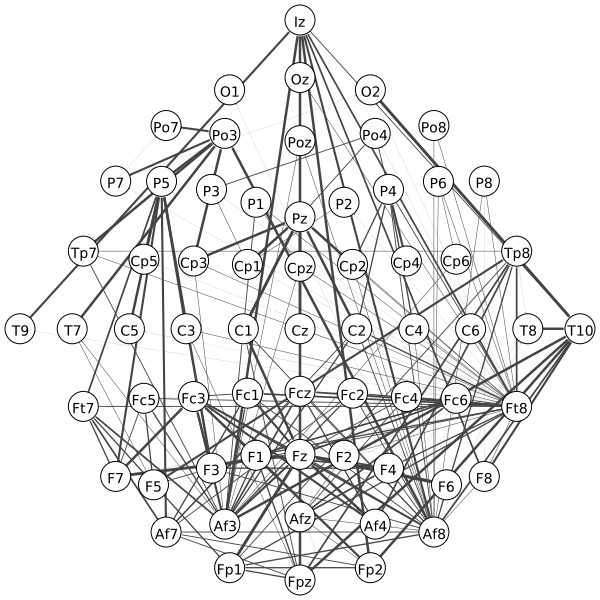

In [63]:
EO.plot_motifs_36('data/EO_10Hz_0.05dt_Motifs_MEMBERS.txt',
                  name='data/EO_0.05_motif36', save=False)

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [64]:
# Motif file structure: EC
with open('data/EC_10Hz_0.05dt_Motifs_MEMBERS.txt', 'r') as f:
    for _ in range(9):
        print(f.readline())
    
    print('\t...')

subgraph id = 36

Nreal : 321


Partial list of 320 members:



1	32	2	

11	53	52	

18	53	52	

19	45	20	

	...


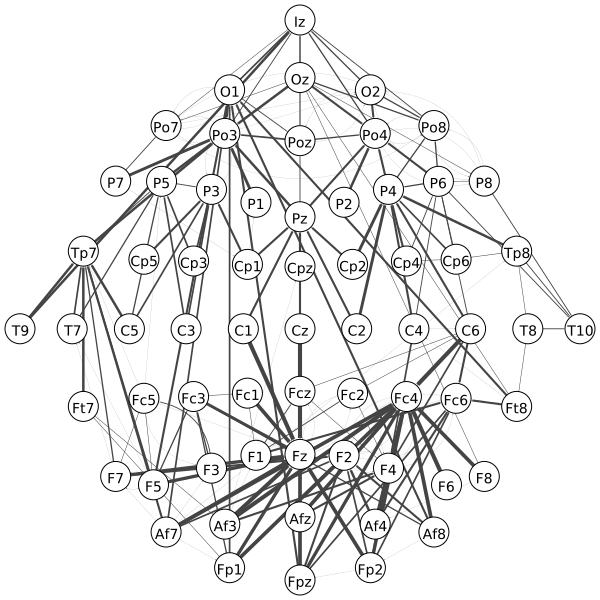

In [65]:
EC.plot_motifs_36('data/EC_10Hz_0.05dt_Motifs_MEMBERS.txt',
                   name='data/EC_0.05_motif36', save=False)

### 3.3. (class ‘C’) 
Choose a channel selected in parieto-occipital scalp region and determine the motifs which involve it.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [66]:
df_prova = EO.find_motifs(channel='Po3')
df_prova

motif  occurrencies
0            A->B<-C            20
4      A->B<-C, A->C             1
1            A->B->C             0
2           A<->B<-C             0
3            A<-B->C             0
5     A<-B->C, A<->C             0
6           A<->B->C             0
7          A<->B<->C             0
8      A<-B<-C, A->C             0
9     A->B->C, A<->C             0
10    A->B<-C, A<->C             0
11   A->B<->C, A<->C             0
12  A<->B<->C, A<->C             0

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [67]:
EC.find_motifs('Po3')

motif  occurrencies
0            A->B<-C            32
2           A<->B<-C            18
1            A->B->C            17
4      A->B<-C, A->C            11
6           A<->B->C             4
5     A<-B->C, A<->C             3
9     A->B->C, A<->C             3
10    A->B<-C, A<->C             2
3            A<-B->C             1
7          A<->B<->C             1
8      A<-B<-C, A->C             1
11   A->B<->C, A<->C             1
12  A<->B<->C, A<->C             0

### Additional: let's see the motifs in configuration A-->B<--C involving Po3 channel

In [68]:
# channel selected: Po3 (57)
# in our notation (from 0 to 64) Po3 correspond to 56

# we can directly plot it with our figure
# remaking member analysis

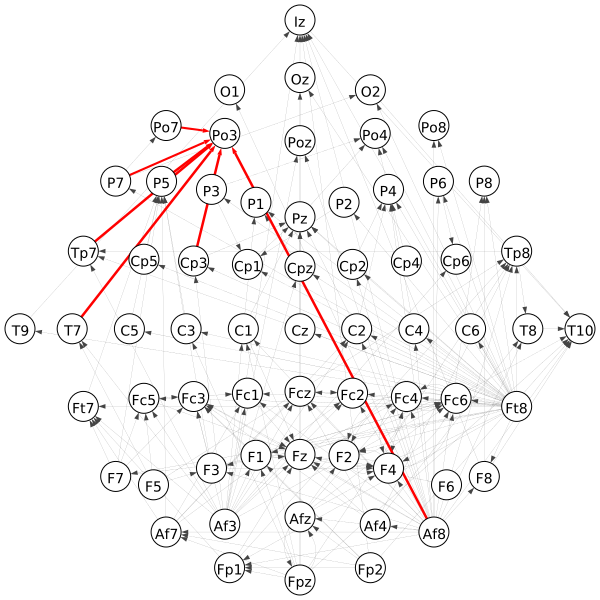

In [69]:
# plot for EO (pattern A->B<-C)
EO.plot_motifs_36('data/EO_10Hz_0.05dt_Motifs_MEMBERS.txt', 'EO_motifsPlot_Po3', 
                  single_channel=56, motifcolor="red", save=False, tipsize=0.5)

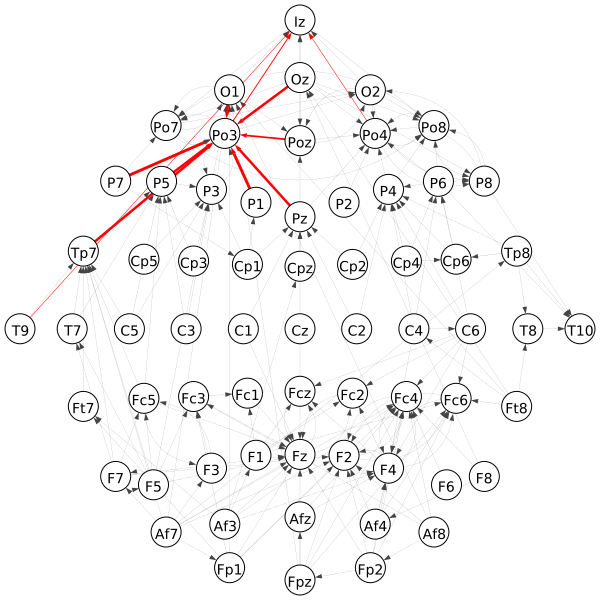

In [70]:
# plot for EC (pattern A->B<-C)
EC.plot_motifs_36('data/EC_10Hz_0.05dt_Motifs_MEMBERS.txt', 'EC_motifsPlot_Po3', 
                  single_channel=56, motifcolor="red", save=False, tipsize=0.5)

### 4. (class ‘E’)

Perform the same analysis described in task 3.1 considering 4-node motifs

The same analysis has been performed using mfinder. The netork used was the same of point 3.1

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

In [71]:
with open('data/EO_10Hz_0.05dt_4_Motifs_OUT.txt', 'r') as f:
    for _ in range(51):
        print(f.readline())
        
print('...\n...\nCheck EO_10Hz_0.05dt_4_Motifs_OUT.txt for more info')



   Summary motif results


mfinder Version 1.20



MOTIF FINDER RESULTS:



	Network name: ../data/EO_10Hz_0.05dt_Motifs.txt

	Network type: Directed

	Num of Nodes: 63 Num of Edges: 201

	Num of Nodes with edges: 63

	Maximal out degree (out-hub) : 41

	Maximal in degree (in-hub) : 10

	Roots num: 7 Leaves num: 12

	Single Edges num: 181 Mutual Edges num: 7



	Motif size searched  4

	Total number of 4-node subgraphs : 22374

	Number of random networks generated : 2000

	Random networks generation method: Switches

	Num of Switches range: 100.0-200.0, Success switches Ratio:0.372+-0.01



The following motifs were found:



Criteria taken : Pval < 0.010

                 Mfactor > 1.10

                 Uniquness ignored



MOTIF	NREAL	NRAND		NREAL	NREAL	UNIQ	CREAL

ID		STATS		ZSCORE	PVAL	VAL	[MILI]	

74	1696	1200.1+-138.0	3.59	0.000	0	75.79



0 1 0 1 

0 0 1 0 

0 0 0 0 

0 0 0 0 



340	1	0.0+-0.0	888888	0.000	0	0.03



0 0 1 0 

1 0 1 0 

1 0 0 0 

0 0 0 0 



904	56	18.2+-7.2	

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

In [72]:
with open('data/EC_10Hz_0.05dt_4_Motifs_OUT.txt', 'r') as f:
    for _ in range(51):
        print(f.readline())
        
print('...\n...\nCheck EC_10Hz_0.05dt_4_Motifs_OUT.txt for more info')



   Summary motif results


mfinder Version 1.20



MOTIF FINDER RESULTS:



	Network name: ../data/EC_10Hz_0.05dt_Motifs.txt

	Network type: Directed

	Num of Nodes: 63 Num of Edges: 201

	Num of Nodes with edges: 63

	Maximal out degree (out-hub) : 9

	Maximal in degree (in-hub) : 14

	Roots num: 18 Leaves num: 1

	Single Edges num: 160 Mutual Edges num: 17



	Motif size searched  4

	Total number of 4-node subgraphs : 5372

	Number of random networks generated : 2000

	Random networks generation method: Switches

	Num of Switches range: 100.0-200.0, Success switches Ratio:0.688+-0.01



The following motifs were found:



Criteria taken : Pval < 0.010

                 Mfactor > 1.10

                 Uniquness ignored



MOTIF	NREAL	NRAND		NREAL	NREAL	UNIQ	CREAL

ID		STATS		ZSCORE	PVAL	VAL	[MILI]	

206	17	2.8+-2.0	7.26	0.000	0	3.16



0 1 1 1 

0 0 1 1 

0 0 0 0 

0 0 0 0 



222	5	0.0+-0.2	24.14	0.000	0	0.99



0 1 1 1 

1 0 1 1 

0 0 0 0 

0 0 0 0 



394	68	21.9+-6.9	6.73	0.00

## 4. Community detection

### 4.1. (mandatory) 
Determine number and composition (i.e. list of nodes) of the communities
obtained applying one of the algorithms introduced during the course.

#### Louvain_Algorithm - Optimal_Modularity

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

/home/jason/anaconda3/lib/python3.7/site-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


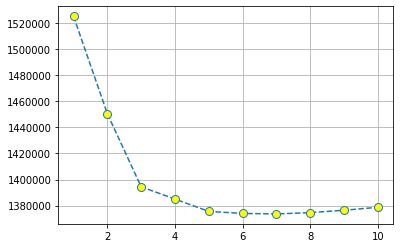


best model order p: 7



In [73]:
PDC_open = npm.Connectivity_Graph('PDC')
PDC_open.import_data(open_eyes)
PDC_open.connectivity(freq=freq_alpha,threshold=0.2,plot=True)

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

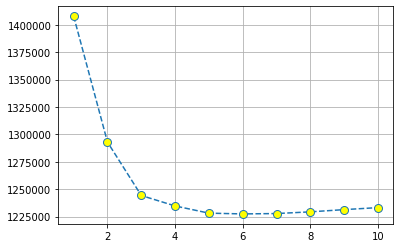


best model order p: 6



In [74]:
PDC_closed = npm.Connectivity_Graph('PDC')
PDC_closed.import_data(closed_eyes)
PDC_closed.connectivity(freq=freq_alpha,threshold=0.2,plot=True)

### 4.2. (class ‘B’) 
Make a graphical representation of the community structure in both rest conditions.

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

The estimated number of communities is 5


Communities
Community number 0 - size: 21
Community number 1 - size: 13
Community number 2 - size: 12
Community number 3 - size: 10
Community number 4 - size: 8

The communities are:

odict_items([(0, ['C3', 'C1', 'Cz', 'C2', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'Po3', 'Poz', 'Po4', 'O1', 'O2']), (1, ['Fp1', 'Fpz', 'Fp2', 'Afz', 'Af4', 'Af8', 'F8', 'T8', 'T9', 'T10', 'Tp8', 'P8', 'Iz']), (2, ['Fc5', 'Fc3', 'Fc1', 'Af7', 'F7', 'F5', 'F3', 'Fz', 'F6', 'Ft7', 'T7', 'P5']), (3, ['C5', 'C4', 'C6', 'Cp5', 'Ft8', 'Tp7', 'P7', 'Po7', 'Po8', 'Oz']), (4, ['Fcz', 'Fc2', 'Fc4', 'Fc6', 'Af3', 'F1', 'F2', 'F4'])])


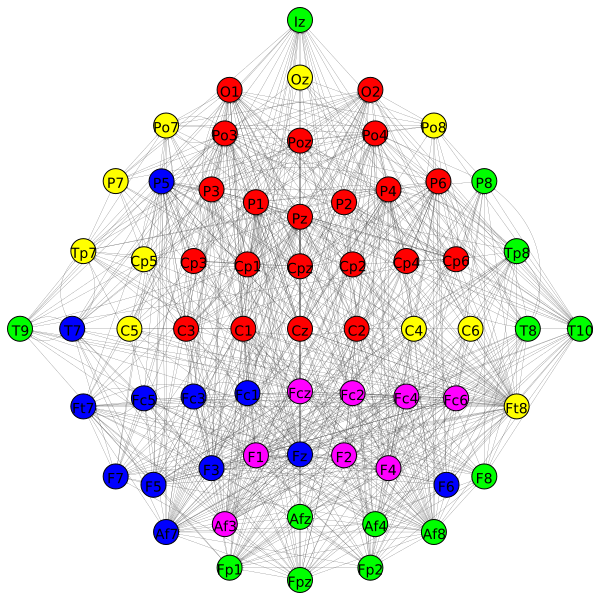

In [75]:
comms_mod_open,graph = PDC_open.optimal_modularity_community_detection(name='optimal_modularity_open_eyes')
graph

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

The estimated number of communities is 4


Communities
Community number 0 - size: 22
Community number 1 - size: 18
Community number 2 - size: 15
Community number 3 - size: 9

The communities are:

odict_items([(0, ['C5', 'C3', 'Cz', 'Cp5', 'Cp3', 'Cp1', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8', 'O1', 'Oz', 'O2', 'Iz']), (1, ['Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'C1', 'C2', 'Fpz', 'Fp2', 'Afz', 'Af4', 'Af8', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft8']), (2, ['Fc5', 'Fc3', 'Cpz', 'Cp2', 'Fp1', 'Af7', 'Af3', 'F7', 'F5', 'F3', 'F1', 'Ft7', 'T7', 'T9', 'Tp7']), (3, ['C4', 'C6', 'Cp4', 'Cp6', 'T8', 'T10', 'Tp8', 'P4', 'P6'])])


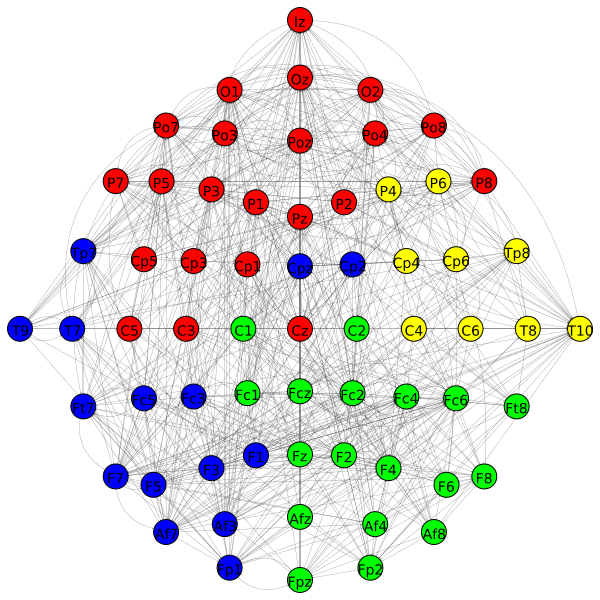

In [76]:
comms_mod_closed,graph = PDC_closed.optimal_modularity_community_detection(name='optimal_modularity_closed_eyes')
graph

### 4.3. (class ‘C’) 
Compare the community structure obtained by means of two different methods
(modularity-based vs information theory-based approaches).

#### Infomap_Algorithm_random_walk - Information_Theory

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

The estimated number of communities is 4


Communities
Community number 0 - size: 25
Community number 1 - size: 33
Community number 2 - size: 2
Community number 3 - size: 4

The communities are:

odict_items([(0, ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'Fp1', 'Fpz', 'Fp2', 'Af7']), (1, ['Af3', 'Afz', 'Af4', 'Af8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft7', 'Ft8', 'T7', 'T8', 'T9', 'T10', 'Tp7', 'Tp8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'Po7', 'Po3', 'Poz']), (2, ['Po4', 'Po8']), (3, ['O1', 'Oz', 'O2', 'Iz'])])


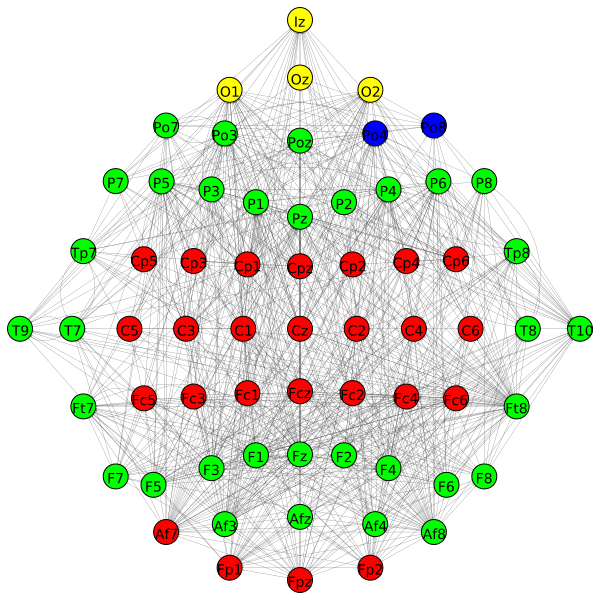

In [77]:
comms_info_open,graph  = PDC_open.infomap_community_detection(name='information_theory_open_eyes')
graph

#### Communities comparison for open_eyes_case

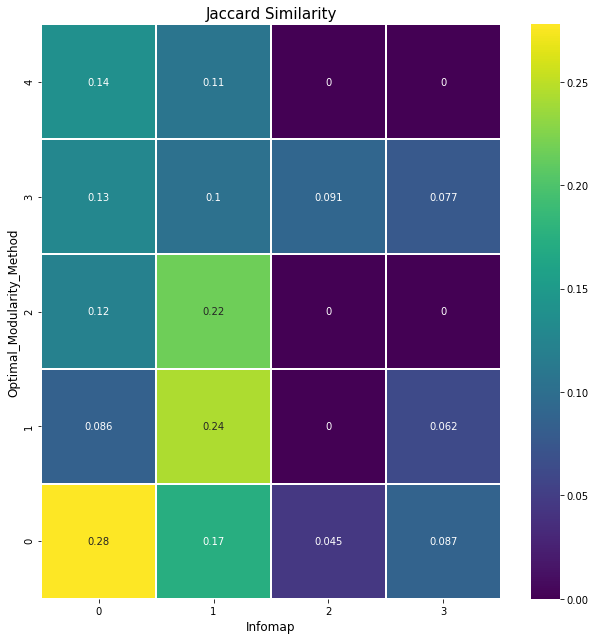

In [78]:
M = np.zeros([len(comms_mod_open),len(comms_info_open)])
for i in range(len(comms_mod_open)):
    for j in range(len(comms_info_open)):
        #JACCARD SIMILARITY
        M[i,j] = len(set(comms_mod_open[i]).intersection(set(comms_info_open[j])))/len(set(comms_mod_open[i]).union(set(comms_info_open[j])))

M = pd.DataFrame(M)
plt.figure(figsize=(9,9))
ax = sns.heatmap(M,xticklabels=M.columns+1,yticklabels=M.columns+1,annot=True,cmap='viridis',linewidths=1,square=True)
ax.invert_yaxis()
plt.xlabel('Infomap',fontsize=12)
xlabels = comms_info_open.keys()
ylabels = comms_mod_open.keys()
plt.xticks(np.arange(len(comms_info_open))+0.5, xlabels,)
plt.yticks(np.arange(len(comms_mod_open))+0.5, ylabels)
plt.ylim(0,len(comms_mod_open))
plt.ylabel('Optimal_Modularity_Method',fontsize=12)
plt.title('Jaccard Similarity',fontsize=15)
plt.tight_layout()
plt.show()

The estimated number of communities is 5


Communities
Community number 0 - size: 5
Community number 1 - size: 7
Community number 2 - size: 39
Community number 3 - size: 12
Community number 4 - size: 1

The communities are:

odict_items([(0, ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2']), (1, ['Fc4', 'Fc6', 'C5', 'C3', 'C1', 'Cz', 'C2']), (2, ['C4', 'C6', 'Cp5', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Af3', 'Afz', 'Af4', 'Af8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft7', 'Ft8', 'T7', 'T8', 'T9', 'T10', 'Tp7', 'Tp8', 'P7', 'P5', 'P3', 'P1', 'Pz']), (3, ['P2', 'P4', 'P6', 'P8', 'Po7', 'Po3', 'Poz', 'Po4', 'Po8', 'O1', 'Oz', 'O2']), (4, ['Iz'])])


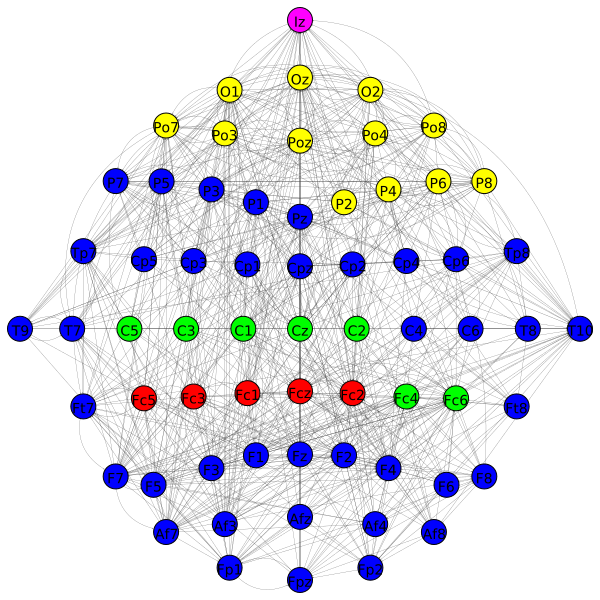

In [79]:
comms_info_closed,graph = PDC_closed.infomap_community_detection(name='information_theory_closed_eyes')
graph

#### Communities comparison for closed_eyes_case

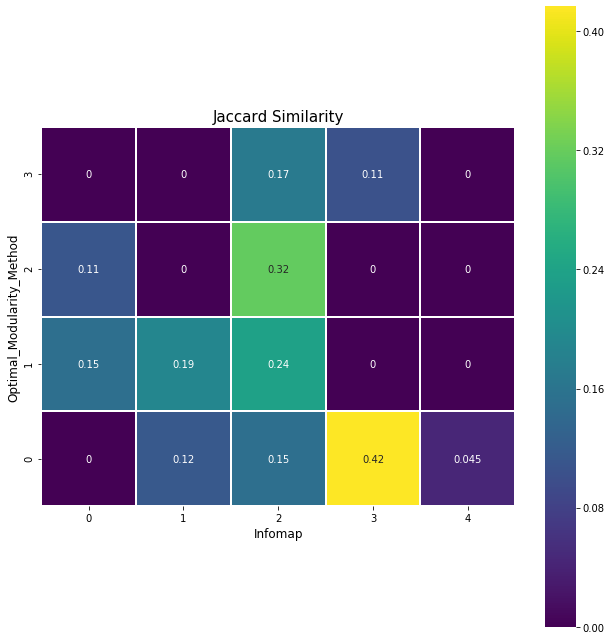

In [80]:
M = np.zeros([len(comms_mod_closed),len(comms_info_closed)])
for i in range(len(comms_mod_closed)):
    for j in range(len(comms_info_closed)):
        #JACCARD SIMILARITY
        M[i,j] = len(set(comms_mod_closed[i]).intersection(set(comms_info_closed[j])))/len(set(comms_mod_closed[i]).union(set(comms_info_closed[j])))

M = pd.DataFrame(M)

plt.figure(figsize=(9,9))
ax = sns.heatmap(M,xticklabels=M.columns+1,yticklabels=M.columns+1,annot=True,cmap='viridis',linewidths=1,square=True)
ax.invert_yaxis()
plt.xlabel('Infomap',fontsize=12)
xlabels = comms_info_closed.keys()
ylabels = comms_mod_closed.keys()
plt.xticks(np.arange(len(comms_info_closed))+0.5, xlabels,)
plt.yticks(np.arange(len(comms_mod_closed))+0.5, ylabels)
plt.ylim(0,len(comms_mod_closed))
plt.ylabel('Optimal_Modularity_Method',fontsize=12)
plt.title('Jaccard Similarity',fontsize=15)
plt.tight_layout()
plt.show()

#### plot of how number of communities varies for both resting cases for both methods

In [81]:

##densities threshold

densities = [0.05,0.1,0.2,0.3,0.5]
m1 = []
m2 = []
m3 = []
m4 = []

for d in tqdm_notebook(densities):
    PDC_open = npm.Connectivity_Graph('PDC')
    PDC_open.import_data(open_eyes)
    PDC_open.connectivity(freq=freq_alpha,threshold=d,plot=False,order=order_open)
    PDC_closed = npm.Connectivity_Graph('PDC')
    PDC_closed.import_data(closed_eyes)
    PDC_closed.connectivity(freq=freq_alpha,threshold=d,plot=False,order=order_closed)
    comms_open_mod = PDC_open.optimal_modularity_community_detection(visual = False)
    comms_closed_mod = PDC_closed.optimal_modularity_community_detection(visual = False)
    comms_open_info = PDC_open.infomap_community_detection(visual = False)
    comms_closed_info = PDC_closed.infomap_community_detection(visual = False)
    m1.append(len(comms_open_mod))
    m2.append(len(comms_open_info))
    m3.append(len(comms_closed_mod))
    m4.append(len(comms_closed_info))

The estimated number of communities is 5


Communities
Community number 0 - size: 21
Community number 1 - size: 19
Community number 2 - size: 14
Community number 3 - size: 5
Community number 4 - size: 5

The communities are:

odict_items([(0, ['C5', 'Cz', 'C2', 'C4', 'C6', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Ft8', 'Tp7', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P8', 'Po4', 'Po8', 'Oz']), (1, ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'C1', 'Cp5', 'Cp6', 'Fp2', 'Af7', 'Af3', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F6', 'Ft7', 'P5']), (2, ['C3', 'Fp1', 'Fpz', 'Af4', 'Af8', 'F8', 'T8', 'T9', 'T10', 'Tp8', 'P6', 'Poz', 'O1', 'Iz']), (3, ['T7', 'P7', 'Po7', 'Po3', 'O2']), (4, ['Fc4', 'Fc6', 'Afz', 'F2', 'F4'])])
The estimated number of communities is 6


Communities
Community number 0 - size: 17
Community number 1 - size: 14
Community number 2 - size: 11
Community number 3 - size: 10
Community number 4 - size: 6
Community number 5 - size: 6

The communities are:

odict_items([(0, ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 

The estimated number of communities is 4


Communities
Community number 0 - size: 22
Community number 1 - size: 22
Community number 2 - size: 14
Community number 3 - size: 6

The communities are:

odict_items([(0, ['C5', 'Cp5', 'Fp1', 'Fpz', 'Fp2', 'Af7', 'Afz', 'Af4', 'Af8', 'F6', 'F8', 'Ft8', 'T8', 'T9', 'T10', 'Tp7', 'Tp8', 'P7', 'P8', 'Po8', 'Oz', 'Iz']), (1, ['C3', 'Cz', 'C2', 'Cp3', 'Cp1', 'Cpz', 'Cp2', 'Cp4', 'Cp6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'Po7', 'Po3', 'Poz', 'Po4', 'O1', 'O2']), (2, ['Fc5', 'Fc3', 'Fc1', 'Fcz', 'Fc2', 'C1', 'Af3', 'F7', 'F5', 'F3', 'F1', 'Fz', 'Ft7', 'T7']), (3, ['Fc4', 'Fc6', 'C4', 'C6', 'F2', 'F4'])])
The estimated number of communities is 4


Communities
Community number 0 - size: 17
Community number 1 - size: 16
Community number 2 - size: 16
Community number 3 - size: 15

The communities are:

odict_items([(0, ['Fc1', 'Fcz', 'Fc2', 'Fc4', 'Fc6', 'Fp1', 'Fpz', 'Fp2', 'Afz', 'Af4', 'Af8', 'Fz', 'F2', 'F4', 'F6', 'F8', 'Ft8']), (1, ['Fc5', '

<center><h3><font color = "#772953">Open Eyes</font></h3></center>

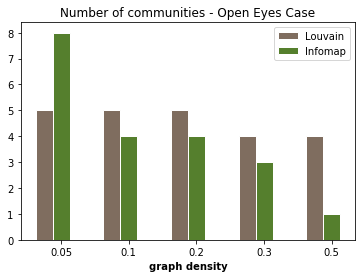

In [82]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = m1
bars2 = m2

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Louvain')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Infomap')
 
# Add xticks on the middle of the group bars
plt.xlabel('graph density', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], densities)
 
# Create legend & Show graphic
plt.title('Number of communities - Open Eyes Case')
plt.legend()
plt.show()

<center><h3><font color = "#772953">Closed Eyes</font></h3></center>

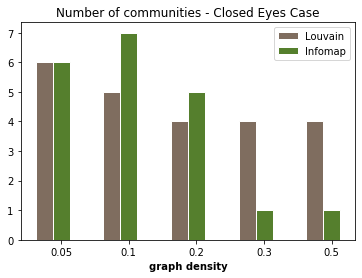

In [83]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = m3
bars2 = m4

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Louvain')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Infomap')
 
# Add xticks on the middle of the group bars
plt.xlabel('graph density', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], densities)
 
# Create legend & Show graphic
plt.title('Number of communities - Closed Eyes Case')
plt.legend()
plt.show()